In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../datasets/RIASEC_Dataset_preprocessed.csv')


In [3]:
if 'major' in df.columns:
    major_labels = df['major']
    df_features = df.drop(columns=['major'])
else:
    major_labels = None
    df_features = df.copy()

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features.select_dtypes(include=['float64', 'int64']))


In [5]:
text_cols = df_features.select_dtypes(include=['object']).columns
if len(text_cols) > 0:
    print(f"Đang vectorize các cột text: {list(text_cols)}")
    vectorizer = TfidfVectorizer(stop_words='english')
    X_text = vectorizer.fit_transform(df_features[text_cols[0]])  # xử lý cột text đầu tiên
    X_text_dense = X_text.toarray()
    # Gộp dữ liệu số và dữ liệu text
    from numpy import hstack
    X_all = hstack([X_scaled, X_text_dense])
else:
    X_all = X_scaled

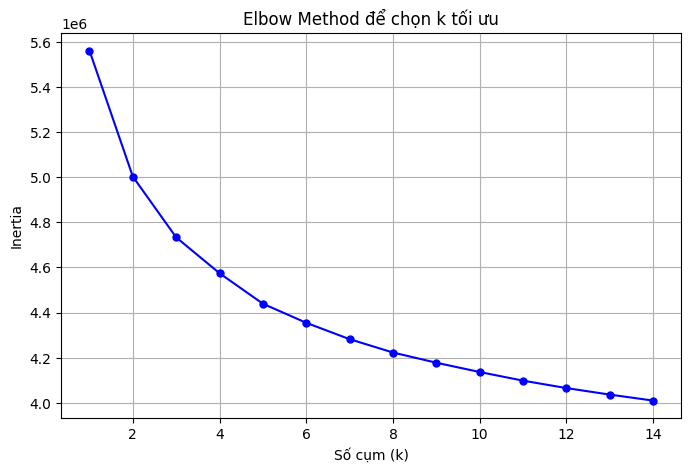

In [6]:
inertia = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_all)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=5)
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method để chọn k tối ưu')
plt.grid(True)
plt.show()

In [19]:
optimal_k = 12  # 🚨 chỉnh tay theo elbow
print(f"Đang phân cụm với k={optimal_k}")

# Phân cụm với k tối ưu
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['major_cluster'] = kmeans.fit_predict(X_all)

Đang phân cụm với k=12


In [20]:
if X_all.shape[1] == 2:
    plt.figure(figsize=(8, 5))
    plt.scatter(X_all[:, 0], X_all[:, 1], c=df['major_cluster'], cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color='black', marker='x', label='Cluster Centers')
    plt.title(f'KMeans Clustering (k={optimal_k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [21]:
if major_labels is not None:
    df['major'] = major_labels
    for i in range(optimal_k):
        print(f"\n--- Cluster {i} ---")
        print(df[df['major_cluster'] == i]['major'].value_counts().head(5))


--- Cluster 0 ---
major
psychology    818
business      652
accounting    280
english       207
education     185
Name: count, dtype: int64

--- Cluster 1 ---
major
psychology     902
biology        314
english        226
business       208
engineering    202
Name: count, dtype: int64

--- Cluster 2 ---
major
psychology    1939
english        490
biology        283
education      233
nursing        220
Name: count, dtype: int64

--- Cluster 3 ---
major
psychology           536
engineering          481
business             467
civil engineering    290
computer science     265
Name: count, dtype: int64

--- Cluster 4 ---
major
psychology    1652
english        383
business       360
nursing        217
education      196
Name: count, dtype: int64

--- Cluster 5 ---
major
psychology    1786
nursing        548
biology        378
business       203
education      178
Name: count, dtype: int64

--- Cluster 6 ---
major
psychology    1546
english        553
business       419
education      29

In [ ]:
df.to_csv('../datasets/RIASEC_Dataset_clustered_v2.csv', index=False)
print("✅ Đã lưu file: ../datasets/RIASEC_Dataset_clustered_v2.csv")